In [ ]:
# tensorflow is an opensource framework and is used to help us in creating our own ML models from scratch
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# we will use keras, which could be considered as a library inside tensorflow, to get our dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
# we are directly splitting the data into train and test sets when we use the load_data()
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
np.unique(train_labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

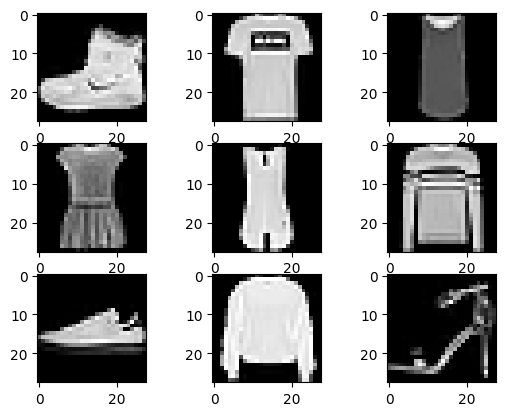

In [ ]:
for i in range(9):
  # 3 rows , 3 columns, 0 is the starting point of the item in our row
  plt.subplot(330+i+1)
  plt.imshow(train_images[i],cmap = 'gray')


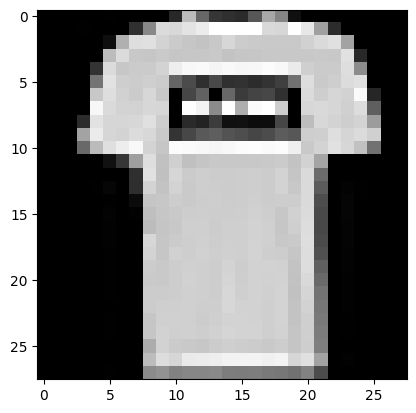

In [ ]:
plt.imshow(train_images[1],cmap="gray")

In [ ]:
train_images[1].shape

(28, 28)

In [ ]:
# scaling the pixel values so they lie in a smaller range to make the training process easier
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# model creation
# we are using keras here because it foucses on deep learning and provides utilites to help in the development process
# any model will have an input layer, a possible amout of hidden layers, and an output layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flatten means we are getting the total amount of pixels given as input to the model
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax") # softmax function returns a probability between 0 and 1
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# deciding on how to improve the model's learning process through the optimizer that adjusts the weight (Adam), the loss function technique (SparseCategoricalCrossentropy), and lastly evaluating the model performance (accuracy)
# This is a specific type of loss function used for multi-class classification problems where the target labels are integers so we are calculating the loss between the predicitons and the true labels
# by using from_logits=True, it ensures that the training process is more stable and accurate
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [ ]:
model.fit(train_images,train_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7785 - loss: 0.6379


In [ ]:
# extra not necessary step just to ensure the output will always be a probability
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.08629283, 0.08628764, 0.08628844, ..., 0.08893332, 0.08662894,
        0.21628115],
       [0.08570103, 0.08567514, 0.22654366, ..., 0.08567405, 0.08567501,
        0.08567405],
       [0.08533928, 0.23195964, 0.0853375 , ..., 0.08533735, 0.08533736,
        0.08533735],
       ...,
       [0.0870248 , 0.08592785, 0.08601473, ..., 0.08596273, 0.22242787,
        0.08593024],
       [0.08534708, 0.2318102 , 0.08534695, ..., 0.0853468 , 0.0853468 ,
        0.08534687],
       [0.08608184, 0.08605607, 0.08610943, ..., 0.08916246, 0.08726014,
        0.08645224]], dtype=float32)

In [ ]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [ ]:
# selecting the first image in the test to predict its label
predictions = probability_model.predict(test_images[:1])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.08629284 0.08628765 0.08628844 0.08628795 0.08628855 0.09041963
  0.08629154 0.08893332 0.08662896 0.21628115]]


In [ ]:
# get the index of the highest probability from the preictions
# then decide on the label based on the index
label = labels[np.argmax(predictions)]

print(label)

ankle_boots


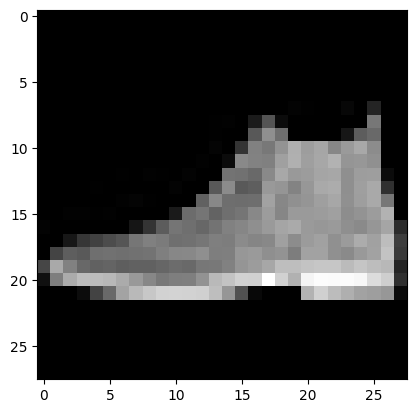

In [ ]:
# test_images[:1][0] gives you the first image itself
# while test_images[:1] gives you an array containing that image
plt.imshow(test_images[:1][0],cmap="gray")
plt.show()

# Task: add more layers and change the number of epochs

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    tf.keras.layers.Dense(128, activation="relu"),  # First hidden layer
    tf.keras.layers.Dense(64, activation="relu"),   # Second hidden layer
    tf.keras.layers.Dense(32, activation="relu"),   # Third hidden layer
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Set the number of epochs
num_epochs = 10

model.fit(x_train, y_train, epochs=num_epochs)
